<a href="https://colab.research.google.com/github/LeraDoroshenko/mn/blob/main/%D0%9B%D0%B0%D0%B19_%D0%94%D0%BE%D1%80%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE%D0%92__4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 9
Завдання 1.
1.    Створити нейронну мережу (модель) з використанням згорткових шарів для є датасета cifar 10 (mnist, fasion mnist).
2. для цього завантажити датасет, вивести перші 10зображень.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


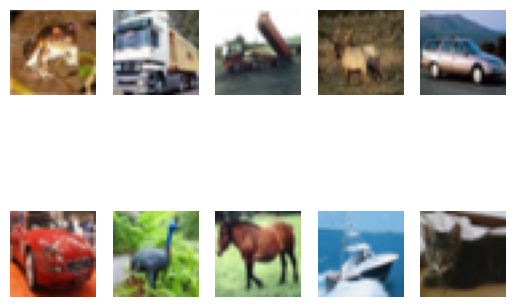

In [1]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

3. Підготувати дані

In [2]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

from keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

4. Підібрати архітектуру моделі (кількість шарів, оптимізатор, розмір батча, кількість епох)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5. При навчанні використовувати кол-бекі (рання зупинка та (або) зменшення швидкості навчання)

In [4]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 109ms/step - accuracy: 0.2848 - loss: 1.9038 - val_accuracy: 0.5365 - val_loss: 1.2923 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 91ms/step - accuracy: 0.5151 - loss: 1.3452 - val_accuracy: 0.5860 - val_loss: 1.1780 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.5919 - loss: 1.1561 - val_accuracy: 0.6141 - val_loss: 1.0792 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 94ms/step - accuracy: 0.6319 - loss: 1.0565 - val_accuracy: 0.6636 - val_loss: 0.9508 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 92ms/step - accuracy: 0.6672 - loss: 0.9608 - val_accuracy: 0.6647 - val_loss: 0.9453 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 72s 93ms/step - accuracy: 0.6886 - loss: 0.8947 - val_accuracy: 0.6914 - val_loss: 0.8802 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 95ms/step - accuracy: 0.7050 -

6. вивести summary

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 480,608 (1.83 MB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,406 (1.22 MB)

7. побудувати графіки функції втрат і точності

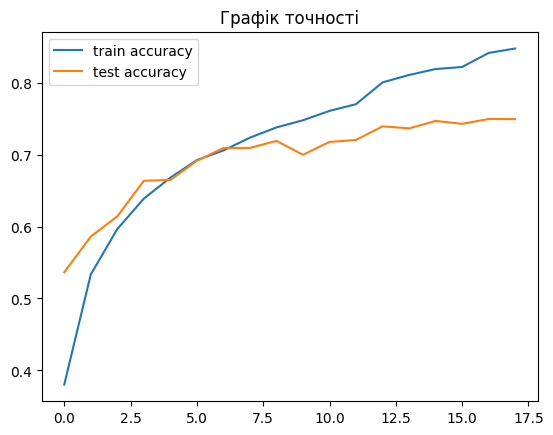

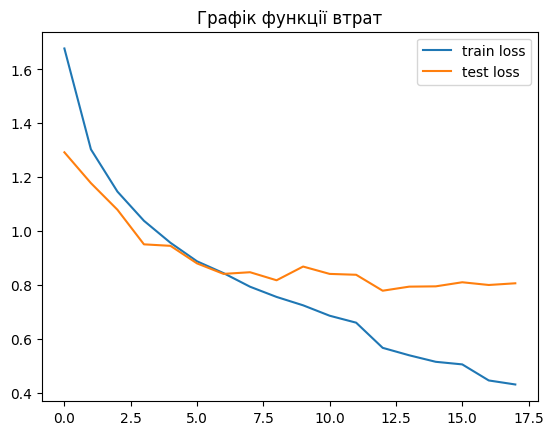

In [6]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.title('Графік точності')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.title('Графік функції втрат')
plt.legend()
plt.show()

8. класифікаційний звіт

In [8]:
import numpy as np
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_classes = [np.argmax(element) for element in y_test]

print(classification_report(y_test_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1000
           1       0.86      0.86      0.86      1000
           2       0.72      0.54      0.62      1000
           3       0.54      0.61      0.57      1000
           4       0.75      0.67      0.71      1000
           5       0.65      0.61      0.63      1000
           6       0.74      0.85      0.79      1000
           7       0.76      0.75      0.76      1000
           8       0.82      0.86      0.84      1000
           9       0.79      0.86      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.74     10000
weighted avg       0.74      0.74      0.74     10000



9. візуалізацію розпізнавання.

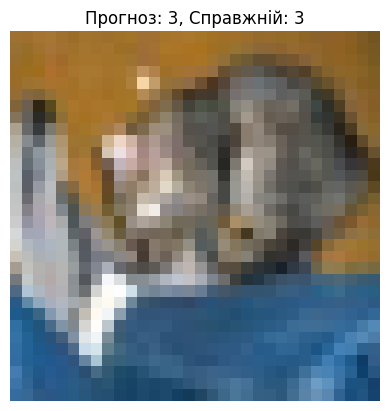

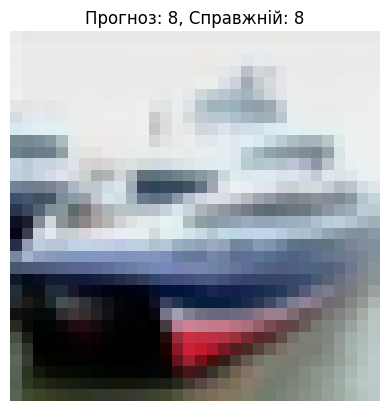

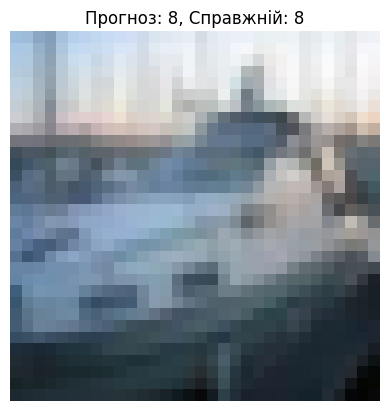

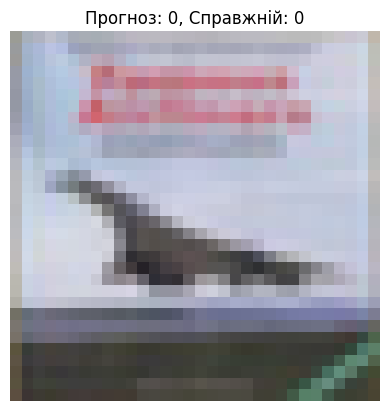

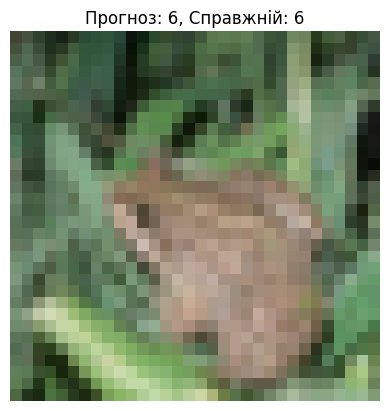

In [9]:
import numpy as np

for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Прогноз: {y_pred_classes[i]}, Справжній: {y_test_classes[i]}")
    plt.axis('off')
    plt.show()

Завданння 2
1.    Побудувати попередньо навчену модель VGG16 (ao VGG19, Resnet та інші)

In [10]:
from keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


2. Зробити тонке налаштування (заморозити частину шарів, додати зверху шари)

In [11]:
for layer in vgg_model.layers:
    layer.trainable = False

In [12]:
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

x = vgg_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model_vgg = Model(inputs=vgg_model.input, outputs=x)
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history_vgg = model_vgg.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test),
                            callbacks=[early_stopping, reduce_lr])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 782s 993ms/step - accuracy: 0.4471 - loss: 1.5921 - val_accuracy: 0.5570 - val_loss: 1.2708 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 757s 968ms/step - accuracy: 0.5750 - loss: 1.2168 - val_accuracy: 0.5772 - val_loss: 1.2061 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 853s 1s/step - accuracy: 0.6023 - loss: 1.1459 - val_accuracy: 0.5927 - val_loss: 1.1767 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 813s 971ms/step - accuracy: 0.6165 - loss: 1.1092 - val_accuracy: 0.5918 - val_loss: 1.1659 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 811s 982ms/step - accuracy: 0.6213 - loss: 1.0880 - val_accuracy: 0.5977 - val_loss: 1.1597 - learning_rate: 0.0010


3. повторити всі кроки як і для попереднього завдання

In [14]:
# Виведення архітектури VGG16 моделі
model_vgg.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          65,6

 Total params: 14,915,552 (56.90 MB)

 Trainable params: 66,954 (261.54 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 133,910 (523.09 KB)

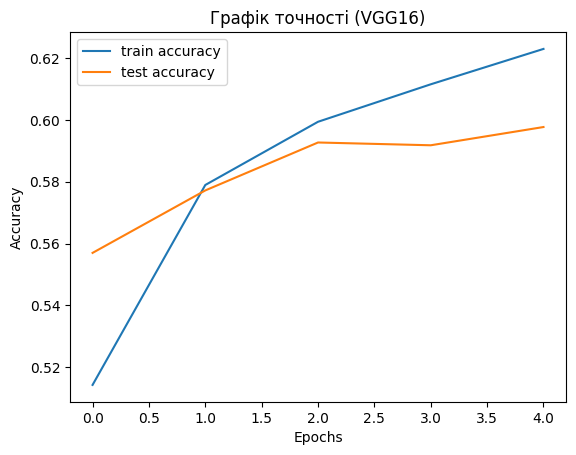

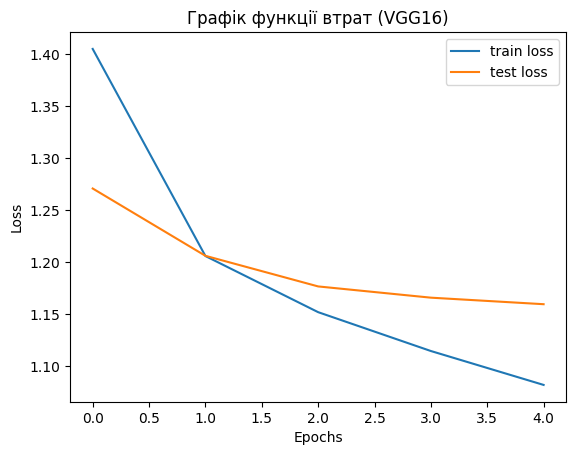

In [16]:
import matplotlib.pyplot as plt

# Графік точності
plt.plot(history_vgg.history['accuracy'], label='train accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='test accuracy')
plt.title('Графік точності (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Графік функції втрат
plt.plot(history_vgg.history['loss'], label='train loss')
plt.plot(history_vgg.history['val_loss'], label='test loss')
plt.title('Графік функції втрат (VGG16)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import classification_report
import numpy as np

# Прогнозування класів на тестовому наборі
y_pred_vgg = model_vgg.predict(X_test)

# Перетворення результатів у класи
y_pred_vgg_classes = [np.argmax(element) for element in y_pred_vgg]
y_test_classes = [np.argmax(element) for element in y_test]

# Класифікаційний звіт
print(classification_report(y_test_classes, y_pred_vgg_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 128s 409ms/step
              precision    recall  f1-score   support

           0       0.67      0.57      0.62      1000
           1       0.54      0.71      0.61      1000
           2       0.50      0.42      0.46      1000
           3       0.47      0.34      0.39      1000
           4       0.50      0.53      0.52      1000
           5       0.62      0.40      0.49      1000
           6       0.53      0.72      0.61      1000
           7       0.53      0.68      0.60      1000
           8       0.64      0.68      0.66      1000
           9       0.60      0.51      0.55      1000

    accuracy                           0.56     10000
   macro avg       0.56      0.56      0.55     10000
weighted avg       0.56      0.56      0.55     10000



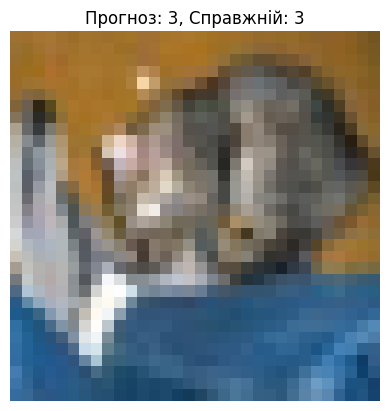

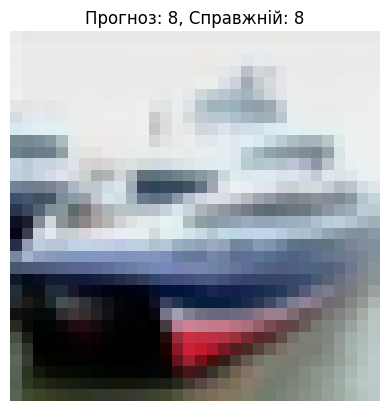

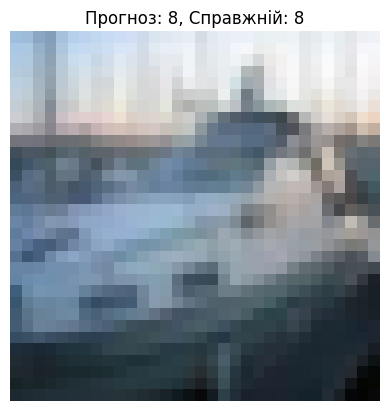

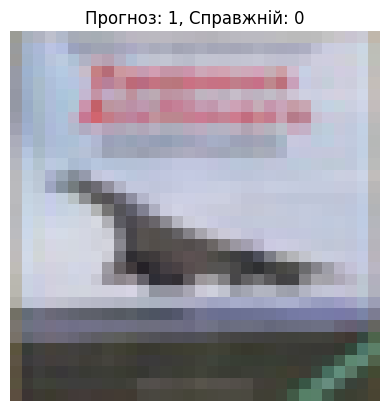

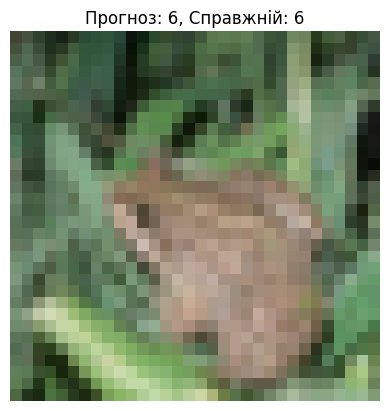

In [18]:
всimport matplotlib.pyplot as plt

# Виведення перших 5 зображень з прогнозами та справжніми класами
for i in range(5):
    plt.imshow(X_test[i])
    plt.title(f"Прогноз: {y_pred_vgg_classes[i]}, Справжній: {y_test_classes[i]}")
    plt.axis('off')
    plt.show()